Image Preprocessing

In [48]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip Dataset.zip

unzip:  cannot find or open Dataset.zip, Dataset.zip.zip or Dataset.zip.ZIP.


Image Data Generator Functionality to train and test set

In [4]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/training_set',target_size=(64,64),batch_size=300,class_mode='categorical',color_mode='grayscale')
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/test_set',target_size=(64,64),batch_size=300,class_mode='categorical',color_mode='grayscale')

Found 15768 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


Model Building

Import the required Libraries

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

Initialize the model

In [6]:
model=Sequential()

Adding Convolution Layer

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))


Adding Pooling Layer

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

Adding Flatten Layer

In [9]:
model.add(Flatten())

Adding Dense Layer

In [10]:
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=9,activation='Softmax'))

Compile the Model

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit and Save the model

In [12]:
model.fit_generator(x_train,steps_per_epoch=24,epochs=10,validation_data=x_test,validation_steps=40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 0.9502 - accuracy: 0.7001 

24/24 [==============================] - 1695s 71s/step - loss: 0.9502 - accuracy: 0.7001 - val_loss: 0.3483 - val_accuracy: 0.9151
Epoch 2/10
24/24 [==============================] - 659s 27s/step - loss: 0.2261 - accuracy: 0.9359
Epoch 3/10
24/24 [==============================] - 357s 15s/step - loss: 0.1212 - accuracy: 0.9668
Epoch 4/10
24/24 [==============================] - 195s 8s/step - loss: 0.0710 - accuracy: 0.9832
Epoch 5/10
24/24 [==============================] - 110s 5s/step - loss: 0.0534 - accuracy: 0.9856
Epoch 6/10
24/24 [==============================] - 64s 3s/step - loss: 0.0348 - accuracy: 0.9929
Epoch 7/10
24/24 [==============================] - 47s 2s/step - loss: 0.0213 - accuracy: 0.9956
Epoch 8/10
24/24 [==============================] - 33s 1s/step - loss: 0.0200 - accuracy: 0.9946
Epoch 9/10
24/24 [==============================] - 28s 1s/step - loss: 0.0145 - accuracy: 0.9965
Epoch 10/10
24/24 [==============================] - 25s 1s/step - loss: 0.011

In [13]:
model.save('aslpng1.h5')

Testing the Model

Import Packages and Load saved Model

In [23]:
from keras.models import load_model
import numpy as np
import cv2

In [18]:
model=load_model('model.h5')

Loading the Test Image, Preprocessing and Predicting

In [50]:
from skimage.transform import resize

In [30]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 24.8 MB/s 


In [51]:
def detect(frame):
  img=resize(frame,(64,64,1))
  img=np.expand_dims(img,axis=0)
  if(np.max(img)>1):
    img=img/255.0
  prediction=model.predict(img)
  print(prediction)

1/1 [==============================] - 0s 20ms/step
[[7.3589194e-07 3.1176359e-07 2.9840255e-08 3.4123502e-07 4.7846964e-07
  7.3650303e-06 9.4001713e-09 2.0357358e-08 9.9999070e-01]]


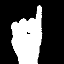

In [52]:
frame=cv2.imread(r'/content/drive/MyDrive/Dataset/Dataset/test_set/I/1.png')
data=detect(frame)
from google.colab.patches import cv2_imshow
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()